# Taller de curvas de validación

En este cuaderno vamos a trabajar con curvas de validación y observar su utilidad en el desarrollo de los modelos.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
plt.rc('font', family='serif')
%matplotlib inline

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
X.shape

(569, 30)

**Ejercicio 1:** retorna la proporción de datos de cada clase presentes en el dataset, lo puedes hacer en un dicccionario, que incluya la clase (llave) y la proporción correspondiente (valor). Esto será útil para hacerle seguimiento a la separación en datos de entrnañiento, validación y prueba 

In [5]:
def label_proportion(y):
    result = {}
    n = y.shape[0]
    for label in np.unique(y):
        ns = np.sum(y == label)
        result[label] = ns/n
    return result

si lo hiciste bien, debería imprimir 0.37 y 0.63

In [6]:
for label, prop in label_proportion(y).items():
    msg = "Proportion of samples with label {}: {:.2f}"
    print(msg.format(label, prop))

Proportion of samples with label 0: 0.37
Proportion of samples with label 1: 0.63


**Ejercicio 2**: implementa una función que parta `X` y `y` en entrenamiento, validación y prueba. Te recomiendo usar la función `train_test_split` como apoyo.

In [7]:
def train_val_test_split(X, y, sizes=(0.6, 0.3, 0.1)):
    #assert sum(sizes) == 1, "Data set sizes should sum to 1!"
    
    n_total = X.shape[0]
    
    train_size, val_size, test_size = sizes[0], sizes[1], sizes[2]
    
    X_, X_test, y_, y_test = train_test_split(X, y, test_size=test_size)
    
    n_train_val = X_.shape[0]
    train_size = train_size*n_total/n_train_val
    
    X_train, X_val, y_train, y_val = train_test_split(
                                    X_, y_, train_size=train_size
    )
        
    return X_train, X_val, X_test, y_train, y_val, y_test

In [8]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

Los diferentes registros en cada conjunto de datos debe ser, con posibles diferencias minúsculas, 341, 171 y 57.

In [9]:
for x_, y_ in zip((X_train, X_val, X_test), (y_train, y_val, y_test)):
    print("X shape: {}, y shape: {}".format(x_.shape, y_.shape))

X shape: (341, 30), y shape: (341,)
X shape: (171, 30), y shape: (171,)
X shape: (57, 30), y shape: (57,)


**Explora la calidad de la partición**: como mencionamos, lo ideal es que las distrubuciones sean similares a lo largo de los conjuntos de entrenamiento, validación y prueba; por lo que es importante validar esto.

In [10]:
for set_, y_ in (("train", y_train), ("val", y_val), ("test", y_test)):
    for label, prop in label_proportion(y_).items():
        msg = "Proportion of samples with label {}: {:.2f} ({})"
        print(msg.format(label, prop, set_))

Proportion of samples with label 0: 0.37 (train)
Proportion of samples with label 1: 0.63 (train)
Proportion of samples with label 0: 0.39 (val)
Proportion of samples with label 1: 0.61 (val)
Proportion of samples with label 0: 0.35 (test)
Proportion of samples with label 1: 0.65 (test)


In [11]:
def show_data_histograms(datasets):
    
    n_sets = len(datasets)
    num_variables = datasets[0][1].shape[1]
      
    fig = plt.figure(figsize=(3*n_sets, num_variables*3))
        
    subs = []
    for i in range(num_variables):
        for j, (k, X_) in enumerate(datasets):
            subs.append((j, k, X_, i))
        
    for p, info in enumerate(subs):
            j, k, X_, i = info

            ax = fig.add_subplot(num_variables, n_sets, p+1)          
            ax.hist(X_[:,i], bins=20)
            
            ax.set_title(k)
            ax.set_xticklabels([])
       
    plt.show()

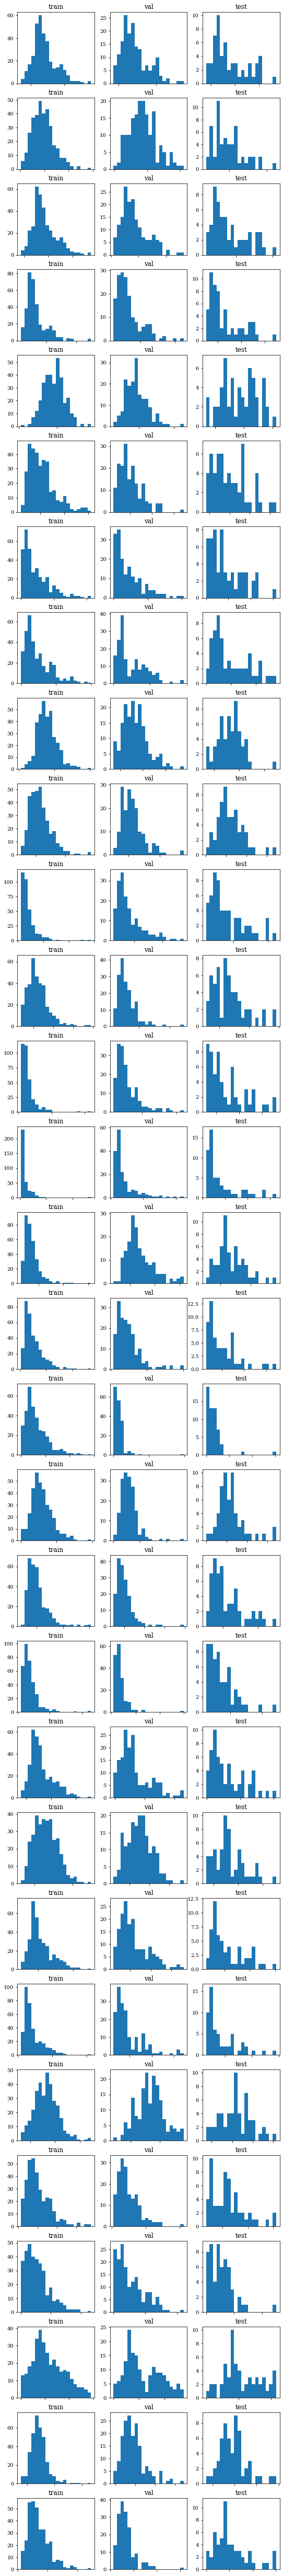

In [12]:
show_data_histograms([('train', X_train), ('val', X_val), ('test', X_test)])

Ahora que tenemos nuestro conjunto de datos separado en entrenamiento, validación y prueba, podemos explorar las curvas de validación y aprendizaje de los diferentes modelos.

**Ejercicio 3:** Elabora una curva de validación para el clasificador `LogisticRegression` de la librería scikit-learn (revisa la [guía de usuario](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) y la [documentación de la clase](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). La curva de validación la debes construir variando el hiperparámetro `C` en los valores `[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]`. Arregla la siguiente celda!


LogisticRegression(C=0.0001, max_iter=10000)

LogisticRegression(C=0.001, max_iter=10000)

LogisticRegression(C=0.01, max_iter=10000)

LogisticRegression(C=0.1, max_iter=10000)

LogisticRegression(C=1, max_iter=10000)

LogisticRegression(C=10, max_iter=10000)

LogisticRegression(C=100, max_iter=10000)

Text(0.5, 0, 'Hiperparameter C')

Text(0, 0.5, 'Accuracy')

(0.8149560117302053, 1.0)

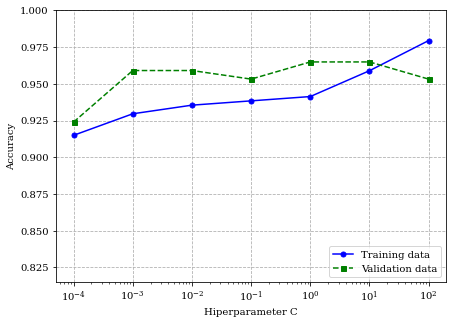

In [16]:
# create empty lists to store training and validation scores
train_scores = []
val_scores = []
param_range = (0.0001, 0.001, 0.01, 0.1, 1, 10, 100)
for c in param_range:
    
    # make an instance of the LogisticRegresión class, in which the parameter
    # C is explicit: clf = LogisticRegression(...)
    clf = LogisticRegression(C=c,max_iter=10000)
    
    # train the model
    clf.fit(X_train, y_train)
    
    # get predictions for training and validation data
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    
    # compute the accuracy score of the model on the training and validation data
    train_score = accuracy_score(y_train, y_train_pred)
    val_score = accuracy_score(y_val, y_val_pred)
    
    # append the computed scores to the corresponding lists
    train_scores.append(train_score)
    val_scores.append(val_score)
    

# plot the scores along the diffent values of the hiper parameter
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(
    param_range, train_scores, color='blue',
    marker='o', linestyle='-', markersize=5, 
    label='Training data'
)

ax.plot(
    param_range, val_scores, color='green',
    marker='s', linestyle='--', markersize=5, 
    label='Validation data'
)

ax.set_xscale('log')
ax.set_xlabel('Hiperparameter C')
ax.set_ylabel('Accuracy')
ax.set_ylim(min(min(train_scores, val_scores)) - 0.1, 1)
ax.grid(linestyle='--')
ax.legend(loc='lower right')

Este mismo procedimiento se puede aplicar para cualquier combinación de modelo,  hiperparámetro y métrica.

**Ejercicio 4:**  Realiza una curva de validación para la clase `KNeighborsClassifier` variando el número de vecinos a considerar; además, esta vez debes usar el `f1_score` como métrica. Como siempre, por favor revisa la [guía de usuario](http://scikit-learn.org/stable/modules/neighbors.html#classification) y la [documentación de la clase](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=19)

Text(0.5, 0, 'Number of neighbors')

Text(0, 0.5, 'F1 score')

(0.819431279620853, 1.0)

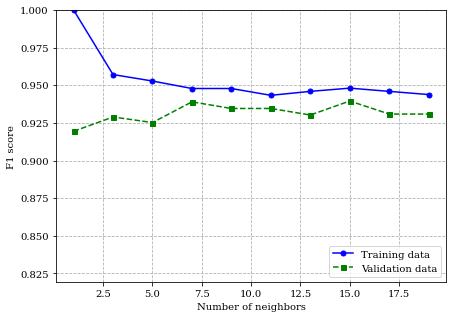

In [17]:
# create empty lists to store training and validation scores
train_scores = []
val_scores = []
param_range = range(1, 20, 2)
for k in param_range:
    
    # make an instance of the LogisticRegresión class, in which the parameter
    # C is explicit: clf = LogisticRegression(...)
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # train the model
    clf.fit(X_train, y_train)
    
    # get predictions for training and validation data
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    
    # compute the f1 score of the model on the training and validation data
    train_score = f1_score(y_train, y_train_pred)
    val_score = f1_score(y_val, y_val_pred)
    
    # append the computed scores to the corresponding lists
    train_scores.append(train_score)
    val_scores.append(val_score)
    

# plot the scores along the diffent values of the hiper parameter
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(
    param_range, train_scores, color='blue',
    marker='o', linestyle='-', markersize=5, 
    label='Training data'
)

ax.plot(
    param_range, val_scores, color='green',
    marker='s', linestyle='--', markersize=5, 
    label='Validation data'
)

ax.set_xlabel('Number of neighbors')
ax.set_ylabel('F1 score')
ax.set_ylim(min(min(train_scores, val_scores)) - 0.1, 1)
ax.grid(linestyle='--')
ax.legend(loc='lower right')